In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# from google.colab import drive
# drive.mount("/content/drive")

/var/folders/wy/hn7gr__x2yg_fd53bwmfc7p40000gn/T/ipykernel_21224/717738464.py:54: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=data.groupby("Hashtag")["Likes","Retweets","TotalEngagement"].sum()


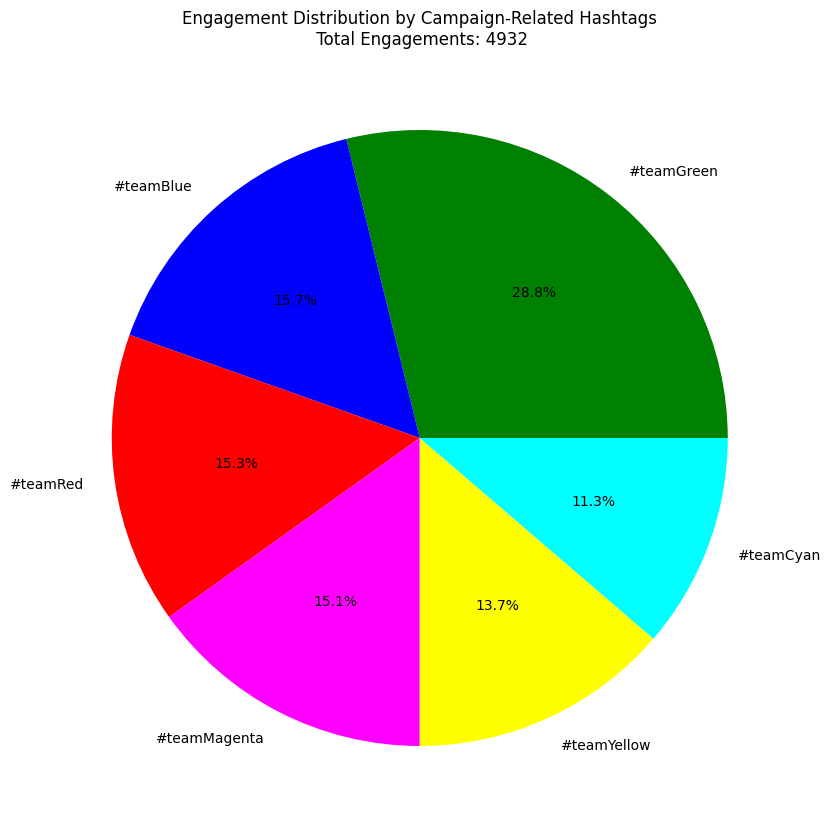

In [8]:
# ---
# Group No. 5
# 1. นาย พุฒิพงศ์ ขำสุวรรณ 6410450559
# 2. นาย ธนสาร วิริยะสุนทรวงศ์ 6410450460
# 3. นาย ศรัณย์ ธราพร 6410451857
# 4.
# ---

group = 5 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 4 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".json"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_json(data_path, lines=True)

# --- เริ่มเขียนโค้ดตรงนี้ ---
# คำนวณ TotalEngagement โดยการนำ Likes และ Retweets มาบวกกัน
data["TotalEngagement"]=data["Likes"]+data["Retweets"]

# แทนที่ Hashtag ที่มีคำว่า "teamCyan" ด้วย "teamCyan"
data["Hashtag"]=data.loc[:,"Hashtag"].str.replace(r".*teamCyan.*","teamCyan",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamBlue" ด้วย "teamBlue"
data["Hashtag"]=data.loc[:,"Hashtag"].str.replace(r".*teamBlue.*","teamBlue",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamRed" ด้วย "teamRed"
data["Hashtag"]=data.loc[:,"Hashtag"].str.replace(r".*teamRed.*","teamRed",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamGreen" ด้วย "teamGreen"
data["Hashtag"]=data.loc[:,"Hashtag"].str.replace(r".*teamGreen.*","teamGreen",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamMagenta" ด้วย "teamMagenta"
data["Hashtag"]=data.loc[:,"Hashtag"].str.replace(r".*teamMagenta.*","teamMagenta",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamYellow" ด้วย "teamYellow"
data["Hashtag"]=data.loc[:,"Hashtag"].str.replace(r".*teamYellow.*","teamYellow",regex=True)

# สร้าง HashtagName_team ซึ่งเป็นลิสต์ของ Hashtag ทั้งหมด
HashtagName_team= ["teamCyan","teamBlue","teamGreen","teamRed","teamMagenta","teamYellow"]

# กรองข้อมูลโดยเก็บเฉพาะข้อมูลที่มี Hashtag อยู่ใน HashtagName_team
data=data[data['Hashtag'].isin(HashtagName_team)]

# จัดกลุ่มข้อมูลตาม Hashtag และคำนวณ Likes, Retweets และ TotalEngagement ในแต่ละกลุ่ม
data=data.groupby("Hashtag")["Likes","Retweets","TotalEngagement"].sum()

# เรียงลำดับข้อมูลตาม TotalEngagement จากมากไปหาน้อย
data=data.sort_values('TotalEngagement', ascending=False)

# Reset index ของ DataFrame
data = data.reset_index()

# กำหนดตัวแปร data1 มารับข้อมูลใน data เพราะว่าข้อมูลใน data ไม่มี # นำหน้าชื่อทีม แต่ในการพล็อตกราฟมี # นำหน้าชื่อทีม ดังนั้น เลยทำการ copy ไว้ 1 อัน สำหรับทำกราฟต่อไป
data1 = data.copy()

# พล็อตกราฟวงกลม
# จัดการข้อมูล
# แทนที่ Hashtag ที่มีคำว่า "teamCyan" ด้วย "#teamCyan"
data1["Hashtag"]=data1.loc[:,"Hashtag"].str.replace(r".*teamCyan.*","#teamCyan",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamBlue" ด้วย "#teamBlue"
data1["Hashtag"]=data1.loc[:,"Hashtag"].str.replace(r".*teamBlue.*","#teamBlue",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamRed" ด้วย "#teamRed"
data1["Hashtag"]=data1.loc[:,"Hashtag"].str.replace(r".*teamRed.*","#teamRed",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamGreen" ด้วย "#teamGreen"
data1["Hashtag"]=data1.loc[:,"Hashtag"].str.replace(r".*teamGreen.*","#teamGreen",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamMagenta" ด้วย "#teamMagenta"
data1["Hashtag"]=data1.loc[:,"Hashtag"].str.replace(r".*teamMagenta.*","#teamMagenta",regex=True)

# แทนที่ Hashtag ที่มีคำว่า "teamYellow" ด้วย "#teamYellow"
data1["Hashtag"]=data1.loc[:,"Hashtag"].str.replace(r".*teamYellow.*","#teamYellow",regex=True)

# กรองข้อมูล
data1 = data1[data1['TotalEngagement'] != 0]

# กำหนดตัวแปร  total เพื่อจะเก็บ ค่ารวมทั้งหมดของ TotalEngagement
total=0

# สร้างลูป เพื่อเก็บค่าข้อมูลใน DataFrame ของคอลัมน์ TotalEngagement เพื่อนำค่าไปตั้งชื่อกราฟ
for i3 in data1["TotalEngagement"]:
  total=total+i3

# สร้างตัวแปร Hashtag_name_color มาเก็บชื่อ Hashtag
Hashtag_name_color=[]

# สร้างลูป เพื่อรับข้อมูลชื่อทีมต่างๆในคอลัมน์ Hashtag ของ data1 และเพิ่มลงในตัวแปร Hashtag_name_color
for i in data1["Hashtag"]:
  Hashtag_name_color.append(i)

# สีตามทีม ถูกเก็บไว้ใน color
color={"#teamRed":"red","#teamMagenta":"magenta","#teamGreen":"green","#teamCyan":"cyan","#teamBlue":"blue","#teamYellow":"yellow"}

# สร้างตัวแปร color_real เพื่อเก็บข้อมูลสีตามทีมที่จะใส่ลงในกราฟวงกลม
color_real=[]

# สร้างลูปเพื่อที่จะนำข้อมูลใน Hashtag_name_color ไปหาใน color เพื่อที่จะได้รู้สีของทีมนั้นๆ และทำการเก็บสีทั้งหมดไว้ใน color_real
for i2 in Hashtag_name_color:
  color2=color.get(i2)
  color_real.append(color2)

# กำหนดขนาดกราฟเป็น 1000*1000
plt.figure(figsize=(10, 10))

# กำหนด data1 ใช้ข้อมูล labels = ข้อมูลชื่อ Hashtag ของแต่ละทีม
# ตั้งสีให้ตรงกับสีทีม โดยคำสั่ง colors=color1
# ใช้ข้อมูล data1 คอลัมน์ TotalEngagement แปลงเป็น % มีจุดทศนิยม 1 ตำแหน่ง เพื่อขึ้นแสดงข้อมูลในกราฟวงกลม
plt.pie(data1['TotalEngagement'], labels=data1['Hashtag'], colors=color_real, autopct='%1.1f%%')

# ตั้งชื่อกราฟ
plt.title('Engagement Distribution by Campaign-Related Hashtags\n Total Engagements: '+str(total))

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()